In [5]:
!pip install sweetviz
import pandas as pd
import sweetviz as sv
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




# CRIANDO DATAFRAMES

In [6]:
file = "https://raw.githubusercontent.com/jumozaga/webScraping/master/livros3.csv"
df = pd.read_csv(file,header=None)
df= df.rename(columns={0: 'Titulo', 1: 'Categoria', 2: 'Classificacao',3:"Preco",4:"Em_estoque"})

# df =pd.read_csv(file, error_bad_lines=False)


In [7]:
df2 = df.copy(deep=True)

In [ ]:
# # convertendo a coluna "Preco" 
# df['Preco'] = df['Preco'].replace('Â£', '')

# Busca a cotação real para REAL - Libra Esterlina

In [8]:
!pip install beautifulsoup4 
!pip install request


from bs4 import BeautifulSoup
import requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [11]:
# Scrap para pegar cotação do dia
cotacao = requests.get('https://www.remessaonline.com.br/cotacao/cotacao-libra-esterlina')
soup = BeautifulSoup(cotacao.text, 'html.parser')  
cotacao = soup.find("div",class_="style__Text-sc-1a6mtr6-2 ljisZu" ) if soup else 6.25
#  <div class="style__Text-sc-1a6mtr6-2 ljisZu">
#   6,20 Reais
#  </div>

# .ihsbbp

In [12]:
real_libra = float((cotacao.text[0:4]).replace(",", "."))
real_libra

6.18


# MODIFICANDO DATAFRAME

In [13]:
# COLOCANDO O PREÇO EM REAIS
# df['Preco']= df['Preco'].str.replace('Â£','')
# df['Preco']= df['Preco'].astype(float) * real_libra
df2['Preco'] = df['Preco'].apply(lambda x: round(float(x.replace('Â£', '')) * real_libra, 2))

In [14]:
#REMOVE DF COLUNA 
# df2 = df.drop('Real', axis=1)

In [15]:
# SUBSTITUINDO IN STOCK POR SIM OU NÃO
df2.loc[df.Em_estoque.str.strip() == 'In stock', 'Em_estoque']= 'SIM'
df2.loc[df.Em_estoque.str.strip() != 'In stock', 'Em_estoque']= 'NÃO' 
# df2['Em_estoque'] = df2['Em_estoque'].apply(lambda x: True if x == 'In stock' else x)
# df2['Em_estoque'] = df2['Em_estoque'].str.strip().apply(lambda x: True if x == 'In stock' else False)



In [16]:
# COLOCANDO AS PALAVRAS EM PORTUGUÊS
df2['Classificacao'] = df2['Classificacao'].replace({'One': 'Um', 'Two': 'Dois', 'Three': 'Três', 'Four': 'Quatro', 'Five': 'Cinco'})
df2['Categoria'] = df2['Categoria'].replace({'Travel': 'Viagem', 'Politics': 'Politica',
                                              'Mystery':'Mistério','Historical Fiction':'Historico Ficção',
                                             'Sequential Art':'Arte','Fiction':'Ficção',
                                             'Womens Fiction':'Ficção Feminina','Fantasy':'Fantasia',
                                             'New Adult':'Novo Adulto','Young Adult':'Jovem Adulto',
                                             'Science':'Ciência','Poetry':'Poesia','Psychology':'Psicologia',
                                             'Art':'Arte','Autobiography':'Autobiografia','Parenting':'Criação de filhos',
                                             'History':'História', 'Food and Drink':'Comida','Business':'Negocios',
                                             'Philosophy':'Filosofia','Nonfiction':'Não Ficção',
                                             'Default':'Padrão','Christian':'Cristão','Health':'Saúde',
                                             'Self Help':'Auto-ajuda','Spirituality':'Religioso',
                                             'Academic':'Acadêmico','Contemporary':'Conteporâneo',
                                             'Thriller':'Ação','Christian Fiction':'Ficção Cristã',
                                             'Add a comment':'Sem Categoria','Adult Fiction':'Ficção Adulta'})


# DF ORIGINAL E MODIFICADO

In [17]:
# DF MODIFICADO
df2


,Titulo,Categoria,Classificacao,Preco,Em_estoque
0,It's Only the Himalayas,Viagem,Dois,279.15,SIM
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,Viagem,Quatro,305.48,SIM
2,See America: A Celebration of Our National Par...,Viagem,Três,302.02,SIM
3,Vagabonding: An Uncommon Guide to the Art of L...,Viagem,Dois,228.29,SIM
4,Under the Tuscan Sun,Viagem,Três,230.70,SIM
...,...,...,...,...,...
995,Why the Right Went Wrong: Conservatism--From G...,Politica,Quatro,325.38,SIM
996,Equal Is Unfair: America's Misguided Fight Aga...,Politica,Um,351.39,SIM
997,Amid the Chaos,Cultural,Um,226.06,SIM
998,Dark Notes,Erotica,Cinco,118.59,SIM


In [18]:
#DF ORIGINAL
df

,Titulo,Categoria,Classificacao,Preco,Em_estoque
0,It's Only the Himalayas,Travel,Two,Â£45.17,In stock
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,Travel,Four,Â£49.43,In stock
2,See America: A Celebration of Our National Par...,Travel,Three,Â£48.87,In stock
3,Vagabonding: An Uncommon Guide to the Art of L...,Travel,Two,Â£36.94,In stock
4,Under the Tuscan Sun,Travel,Three,Â£37.33,In stock
...,...,...,...,...,...
995,Why the Right Went Wrong: Conservatism--From G...,Politics,Four,Â£52.65,In stock
996,Equal Is Unfair: America's Misguided Fight Aga...,Politics,One,Â£56.86,In stock
997,Amid the Chaos,Cultural,One,Â£36.58,In stock
998,Dark Notes,Erotica,Five,Â£19.19,In stock



# ENCONTRANDO INFORMAÇÕES

In [19]:
# Encontrando o maior valor
maior = df2['Preco'].max()
# Encontrando menor valor
menor = df2.min()['Preco']


In [20]:
# verificando se o DataFrame não está vazio
if not df.empty:
    livro_max_preco = df2[df2['Preco'] == maior][['Titulo', 'Classificacao','Preco']].iloc[0]
    livro_min_preco = df2[df2['Preco'] == menor][['Titulo', 'Classificacao','Preco']].iloc[0]
    

In [21]:
# Ordenados pelo preço
ordenada_preco = df2.sort_values('Preco', ascending=False)
# Ordenados pela Classificacao/Avaliação
ordenada_classificacao = df2.sort_values('Classificacao', ascending=True)
#Os 5 mais bem classificados 
classificacao_geral = ordenada_classificacao.head(196)[['Titulo','Categoria','Classificacao']]

In [22]:
# Os 5 mais bem classificados por categoria
top_5 = ordenada_classificacao.groupby('Categoria').apply(lambda x: x.head(5))
# Os 5 mais baratos por categoria
top5_p =ordenada_preco.groupby('Categoria').apply(lambda x : x.tail(5))

In [23]:
livro_max_preco

Titulo           The Perfect Play (Play by Play #1)
Classificacao                                  Três
Preco                                        370.74
Name: 191, dtype: object

In [24]:
livro_min_preco

Titulo           An Abundance of Katherines
Classificacao                         Cinco
Preco                                  61.8
Name: 781, dtype: object

In [25]:
ordenada_preco

,Titulo,Categoria,Classificacao,Preco,Em_estoque
191,The Perfect Play (Play by Play #1),Romance,Três,370.74,SIM
271,Last One Home (New Beginnings #1),Ficção,Três,370.68,SIM
845,Civilization and Its Discontents,Psicologia,Dois,370.49,SIM
925,The Barefoot Contessa Cookbook,Comida,Cinco,370.31,SIM
368,The Diary of a Young Girl,Não Ficção,Três,370.18,SIM
...,...,...,...,...,...
497,Greek Mythic History,Padrão,Cinco,63.22,SIM
77,Patience,Arte,Três,62.79,SIM
666,The Tipping Point: How Little Things Can Make ...,Sem Categoria,Dois,61.92,SIM
804,The Origin of Species,Ciência,Quatro,61.86,SIM


In [26]:
ordenada_classificacao

,Titulo,Categoria,Classificacao,Preco,Em_estoque
855,A Heartbreaking Work of Staggering Genius,Autobiografia,Cinco,335.51,SIM
707,The Star-Touched Queen,Fantasia,Cinco,199.61,SIM
359,Let It Out: A Journey Through Journaling,Não Ficção,Cinco,165.56,SIM
358,Looking for Lovely: Collecting the Moments tha...,Não Ficção,Cinco,180.09,SIM
168,At The Existentialist CafÃ©: Freedom. Being. a...,Filosofia,Cinco,184.97,SIM
...,...,...,...,...,...
549,Harry Potter and the Deathly Hallows (Harry Po...,Padrão,Um,144.12,SIM
543,The Dream Thieves (The Raven Cycle #2),Padrão,Um,213.21,SIM
542,The Fault in Our Stars,Padrão,Um,291.82,SIM
576,Quiet: The Power of Introverts in a World That...,Padrão,Um,269.14,SIM


In [27]:
classificacao_geral

,Titulo,Categoria,Classificacao
855,A Heartbreaking Work of Staggering Genius,Autobiografia,Cinco
707,The Star-Touched Queen,Fantasia,Cinco
359,Let It Out: A Journey Through Journaling,Não Ficção,Cinco
358,Looking for Lovely: Collecting the Moments tha...,Não Ficção,Cinco
168,At The Existentialist CafÃ©: Freedom. Being. a...,Filosofia,Cinco
...,...,...,...
457,The Inefficiency Assassin: Time Management Tac...,Padrão,Cinco
19,A Time of Torment (Charlie Parker #14),Mistério,Cinco
93,Batman: The Dark Knight Returns (Batman),Arte,Cinco
908,The Nerdy Nummies Cookbook: Sweet Treats for t...,Comida,Cinco


In [28]:
top_5

Titulo  Categoria  \
Categoria                                                                     
Acadêmico 976                Logan Kade (Fallen Crest High #5.5)  Acadêmico   
Arte      839                                     Ways of Seeing       Arte   
          118      Saga. Volume 3 (Saga (Collected Editions) #3)       Arte   
          128           Fruits Basket. Vol. 2 (Fruits Basket #2)       Arte   
          135  Rat Queens. Vol. 1: Sass & Sorcery (Rat Queens...       Arte   
...                                                          ...        ...   
Viagem    10                  1.000 Places to See Before You Die     Viagem   
          0                              It's Only the Himalayas     Viagem   
          5                                   A Summer In Europe     Viagem   
          3    Vagabonding: An Uncommon Guide to the Art of L...     Viagem   
          7                     A Year in Provence (Provence #1)     Viagem   

              Classificacao   Preco Em_estoque  
Categoria                                       
Acadêmico 976          Dois   81.08        SIM  
Arte      839         Cinco  244.17        SIM  
          118         Cinco  133.30        SIM  
          128         Cinco   71.94        SIM  
          135         Cinco  290.21        SIM  
...                     ...     ...        ...  
Viagem    10          Cinco  161.17        SIM  
          0            Dois  279.15        SIM  
          5            Dois  274.02        SIM  
          3            Dois  228.29        SIM  
          7          Quatro  351.52        SIM  

[195 rows x 5 columns]

In [29]:
top5_p

Titulo  Categoria  \
Categoria                                                                     
Acadêmico 976                Logan Kade (Fallen Crest High #5.5)  Acadêmico   
Arte      128           Fruits Basket. Vol. 2 (Fruits Basket #2)       Arte   
          106  Adulthood Is a Myth: A "Sarah's Scribbles" Col...       Arte   
          132                      The Complete Maus (Maus #1-2)       Arte   
          836                                  History of Beauty       Arte   
...                                                          ...        ...   
Viagem    4                                 Under the Tuscan Sun     Viagem   
          3    Vagabonding: An Uncommon Guide to the Art of L...     Viagem   
          6                             The Great Railway Bazaar     Viagem   
          10                  1.000 Places to See Before You Die     Viagem   
          8    The Road to Little Dribbling: Adventures of an...     Viagem   

              Classificacao   Preco Em_estoque  
Categoria                                       
Acadêmico 976          Dois   81.08        SIM  
Arte      128         Cinco   71.94        SIM  
          106          Dois   67.36        SIM  
          132          Três   65.76        SIM  
          836        Quatro   63.59        SIM  
...                     ...     ...        ...  
Viagem    4            Três  230.70        SIM  
          3            Dois  228.29        SIM  
          6              Um  188.74        SIM  
          10          Cinco  161.17        SIM  
          8              Um  143.44        SIM  

[195 rows x 5 columns]

# Graficos

In [31]:
import matplotlib.pyplot as plt


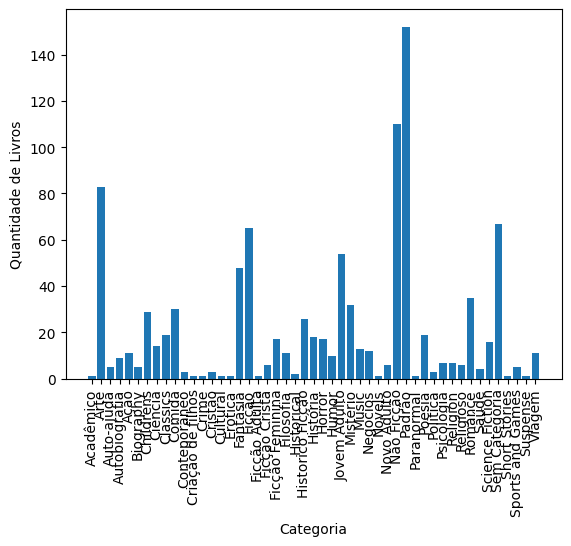

In [32]:
# Gráfico de barras mostrando a quantidade de livros em cada categoria

# Criar um dicionário contendo a contagem de livros em cada categoria
count_by_category = df2.groupby('Categoria')['Titulo'].count().to_dict()

# Criar o gráfico de barras
plt.bar(range(len(count_by_category)), count_by_category.values())

# Definir as etiquetas dos eixos
plt.xticks(range(len(count_by_category)), count_by_category.keys(), rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Livros')

# Exibir o gráfico
plt.show()

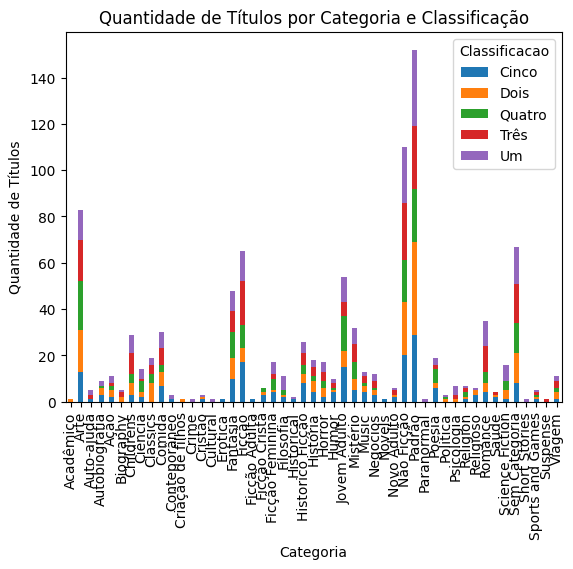

In [33]:
# Quantidade de Títulos por Categoria e Classificação
# criar tabela pivot
pivot_df = df2.pivot_table(index='Categoria', columns='Classificacao', values='Titulo', aggfunc='count')

# criar gráfico de barras
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Títulos')
plt.title('Quantidade de Títulos por Categoria e Classificação')
plt.show()

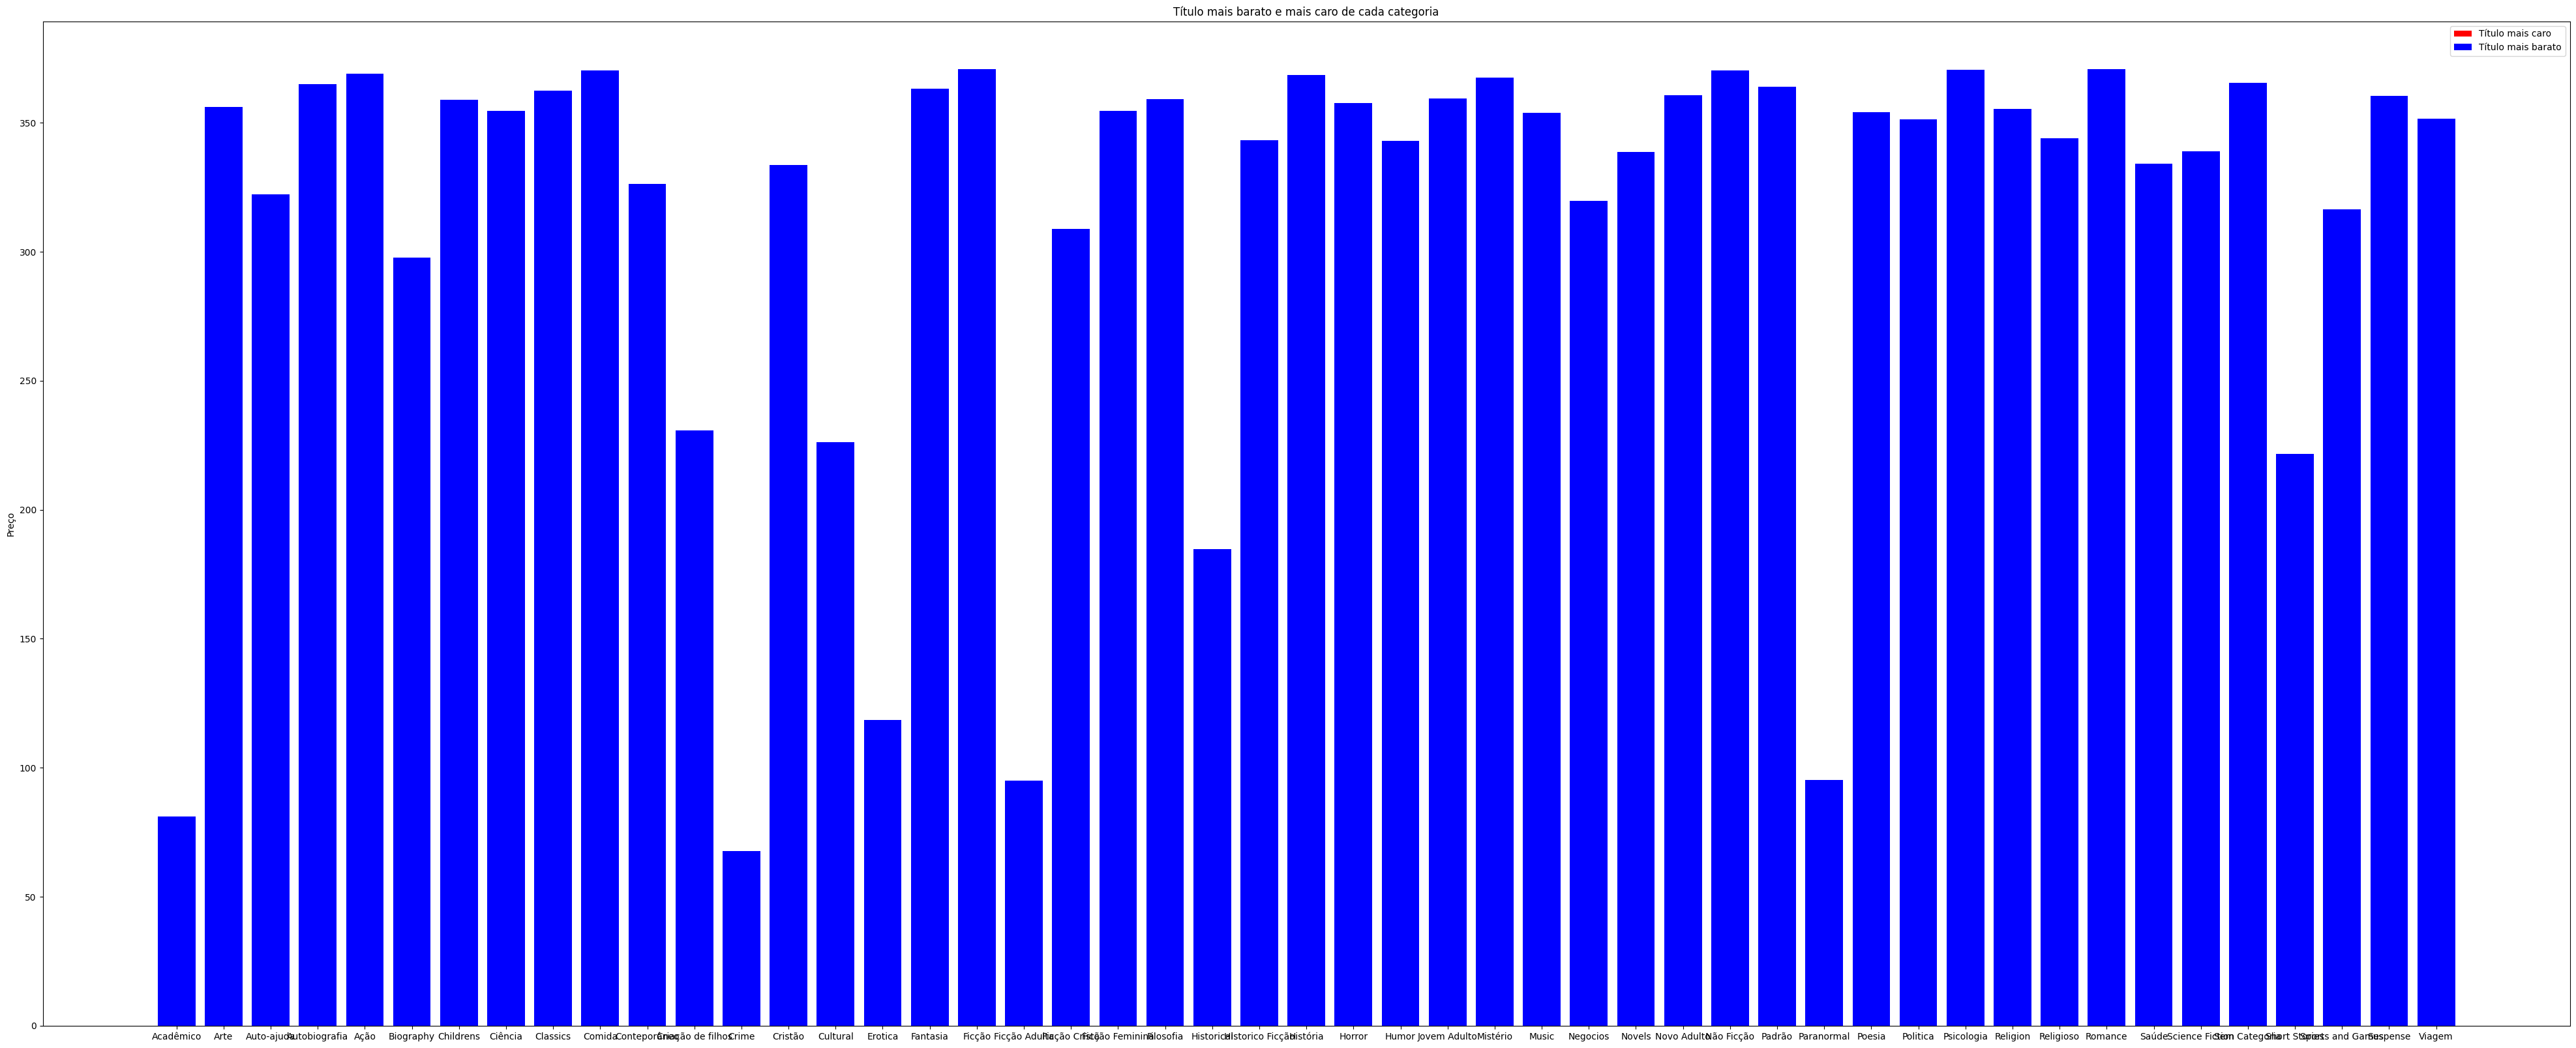

In [34]:

# criando uma tabela pivot para encontrar o título mais barato e mais caro de cada categoria
pivot_df = df2.pivot_table(index='Categoria', values=['Preco', 'Titulo'], aggfunc={'Preco': [min, max], 'Titulo': 'count'})

# renomeando as colunas
pivot_df.columns = ['Titulo mais barato', 'Titulo mais caro', 'Quantidade de títulos']

# criando o gráfico
fig, ax = plt.subplots(figsize=(50, 20))
ax.bar(pivot_df.index, pivot_df['Titulo mais caro'], color='red', label='Título mais caro')
ax.bar(pivot_df.index, pivot_df['Titulo mais barato'], color='blue', label='Título mais barato')
ax.set_ylabel('Preço')
ax.set_title('Título mais barato e mais caro de cada categoria')
ax.legend()
plt.show()

In [219]:
# Gráfico para cada categoria com a quantidade de classificações dos títulos

# agrupando os dados por categoria e somando as classificações em cada categoria
# classif_por_cat = df2.groupby('Categoria')['Classificacao'].sum()
# classif_por_cat = df2.groupby('Categoria')['Classificacao'].count()


# criando um gráfico de barras para cada categoria
# for cat in classif_por_cat.index:
#     plt.figure()
#     classif_por_cat.loc[cat].plot(kind='bar', title=cat)
#     plt.xlabel('Categoria')
#     plt.ylabel('Quantidade de Classificações')
#     plt.show()
# for cat in classif_por_cat.index:
      # plt.figure()
      # plt.bar(classif_por_cat.index, classif_por_cat.values)
      # plt.title(cat)
      # plt.xlabel('Categoria')
      # plt.ylabel('Quantidade de Classificações')
      # plt.show()

In [ ]:
# import seaborn as sns

# # Crie um gráfico de barras para cada categoria
# for categoria in df2['Categoria'].unique():
#     # Filtra os dados pela categoria
#     data_categoria = df2[df2['Categoria'] == categoria]
    
#     # Cria o gráfico de barras
#     ax = sns.countplot(x='Classificacao', data=data_categoria)
#     ax.set(title=f'Títulos de {categoria}', xlabel='Classificação', ylabel='Quantidade')
    

# Criando analise e disponibilizando em html

In [ ]:
report = sv.analyze(df)
report.show_html('base.html')

In [ ]:
svtop5 =sv.analyze(top_5)
svtop5.show_html('top5.html')

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/seri

Report top5.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
svtop5p= sv.analyze(top5_p)
svtop5p.show_html('top5p.html')

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/seri

Report top5p.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
df3 = pd.DataFrame([livro_max_preco, livro_min_preco])
df3

,Titulo,Classificacao,Preco
191,The Perfect Play (Play by Play #1),Três,370.74
781,An Abundance of Katherines,Cinco,61.80


In [97]:

# filtros = {'5 Melhores Avaliados Por categoria': top_5, 'Top 5 por Preço mais baratos':top5_p, "Mais barato":livro_min_preco, "Mais caro":livro_max_preco,
#         }

In [98]:
# df3= pd.DataFrame.from_dict(filtros,orient="columns")
type(top_5)
type(top5_p)
type(livro_min_preco)
type(livro_max_preco)
# report2 =sv.analyze(df3)

pandas.core.series.Series



# Traduzindo os nomes dos livros

In [79]:
# !pip install googletrans
!pip install --upgrade googletrans
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
tradutor = Translator()
# tradutor = Translator(service_urls=['translate.google.com'], timeout=20)

texto = "I am a neww student from Brazil"
r =tradutor.translate(texto,dest='pt').text
r

'Eu sou um novo aluno do Brasil'

In [83]:
# from textblob import TextBlob
# # from textblob import TextBlob
# df2['Categoria'] = df2['Categoria'].apply(lambda x: TextBlob(', '.join(x)).translate(to='pt').text)


In [84]:
# # df2['Titulo'] = df2['Titulo'].apply(lambda x: tradutor.translate(x, dest='pt').text)
# df2['Categoria'] = df2['Categoria'].apply(lambda x: tradutor.translate(x, dest='pt').text)
# df2

In [85]:
# def translate_text(text):
#     try:
#         return tradutor.translate(text, dest='pt').text
#     except:
#         return text

# df['Titulo'] = df['Titulo'].apply(translate_text)

In [86]:
# def translate_text(text):
#     try:
#         return tradutor.translate(text, dest='pt').text
#     except:
#         return text

# df['Em_estoque'] = df['Em_estoque'].apply(translate_text)